## Khalil Koudary
### ID: 40088454

##### COMP 333: Data Analysis, Lab Assignment 4
##### Analyzing Titanic dataset to examine factors that affected the survival rate of children

###### Input Source: Professor's website, Week 2, Example 3, "Jupyter Notebook"

###### Input includes infomation about titanic passengers and whether or not they survived the accident

In [2]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
sns.set_style("whitegrid")


## Importing and Preparing the Data

In [3]:
# reading the titanic train data
train = pd.read_csv("./titanic/train.csv")

In [5]:
# checking the head of the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
len(train)

891

### Data Descriptions:

#### Survival: 0 = No, 1 = Yes.
#### Pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd.
#### Sex: Sex.
#### Age: Age.
#### Sibsp: number of siblings/spouses abroad the Titanic.
#### Paaarch: number of parents/children abroad the Titanic. 
#### Ticket: Ticket number. 
#### Fare: Passenger fare.
#### Cabin: Cabin number. 
#### Embarked: Port Embarkation, C= Cherbourg, Q= Queenstown, S= Southampton

In [7]:
# describing our train df, mainly to see check where we have missing data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Extracting the children (those who are under 18) from the dataset 

In [9]:
# Filter the dataset to include only those who are children (age<18)
children = train[train['Age']<18]

In [21]:
children.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [50]:
#Number of children in the dataset
len(children)

113

In [24]:
# Check for missing values
print(children.isnull().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          94
Embarked        0
dtype: int64


## Story:

### The Titanic was one of the largest and most luxurious ships of its time, but it was also the site of one of the greatest maritime disasters in history. In this analysis, we explored the factors that affected the survival rate of the children who were on board the Titanic.

#### First, we looked at the age distribution of the children who survived and those who didn't. Our analysis showed that younger children had a higher survival rate compared to older children.

In [13]:
#What was the total survival rate of children? (number of children who survived/ total number of children)
total_children = children.shape[0]
number_of_surviving_children = children[children["Survived"] == 1].shape[0]

survival_rate = number_of_surviving_children / total_children
print("Survival rate of children: {:.2f}".format(survival_rate))
print(total_children)
print(number_of_surviving_children)

Survival rate of children: 0.54
113
61


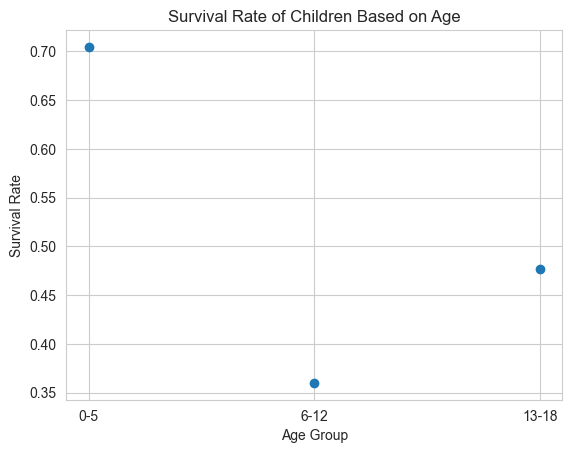

In [29]:
# Divide children into age groups
bins = [0, 5, 12, 18]
age_groups = pd.cut(children["Age"], bins, labels=["0-5", "6-12", "13-18"])

# Calculate the survival rate for each age group
grouped = children.groupby(age_groups)
survival_rates = grouped["Survived"].mean()

# Create a scatter plot to show the relationship between age and survival rate
plt.scatter(survival_rates.index, survival_rates.values)
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Children Based on Age")
plt.show()

#### Next, we investigated the impact of gender on the survival rate of children. The results showed that female children had a higher survival rate compared to male children.

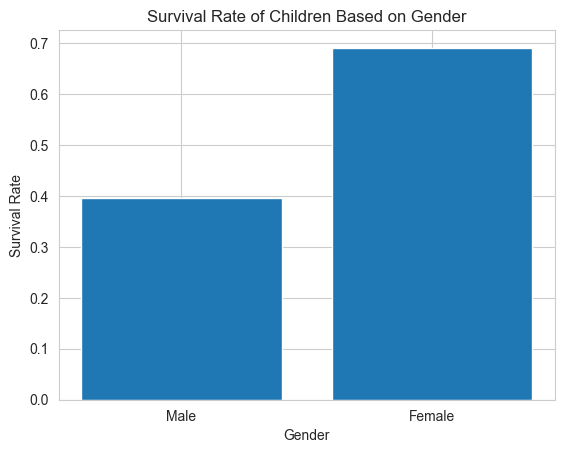

In [30]:
#Calculate the survival rate for male and female children:
male_children = children[children["Sex"] == "male"]
female_children = children[children["Sex"] == "female"]

male_survival_rate = male_children[male_children["Survived"] == 1].shape[0] / male_children.shape[0]
female_survival_rate = female_children[female_children["Survived"] == 1].shape[0] / female_children.shape[0]

labels = ["Male", "Female"]
survival_rates = [male_survival_rate, female_survival_rate]

#Create a bar plot to compare the survival rates of male and female children
plt.bar(labels, survival_rates)
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate of Children Based on Gender")
plt.show()

#### We then looked at the impact of the embarkation port on the survival rate of children. The results showed that children who embarked from the port of Cherbourg had the highest survival rate, followed by those who embarked from Southampton and Queenstown.

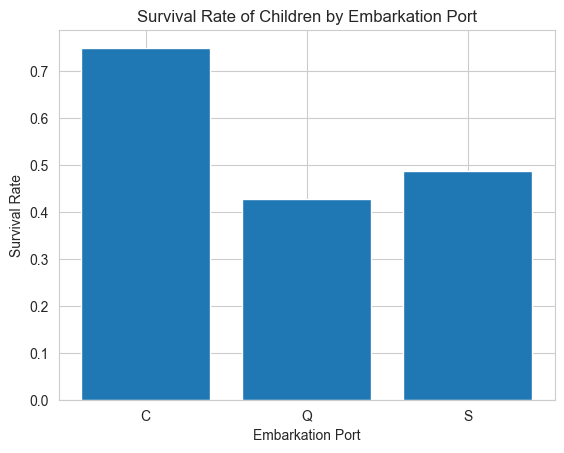

In [31]:
# Calculate the survival rate of children from each embarkation port
port_c_survival_rate = children.groupby('Embarked')['Survived'].mean()

# Create a bar chart of the survival rates of children from each embarkation port
plt.bar(port_c_survival_rate.index, port_c_survival_rate.values)
plt.title('Survival Rate of Children by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()


#### We examined the impact of the size of the family on the survival rate of children. We can see that the survival rate of children varied based on their family size. Children who were part of larger families (with 2-4 members) had a higher survival rate than those who were part of smaller or larger families. It's possible that larger families were better able to help each other during the evacuation process or that they had more resources available to them.

In [21]:
# Create a new column that represents the total number of family members onboard for each child
children['FamilySize'] = children['SibSp'] + children['Parch'] + 1

# Calculate the survival rate of children based on their family size
family_size_survival_rate = children.groupby('FamilySize')['Survived'].mean()

print(family_size_survival_rate)

FamilySize
1    0.434783
2    0.833333
3    0.785714
4    0.916667
5    0.000000
6    0.000000
7    0.333333
8    0.000000
Name: Survived, dtype: float64


/var/folders/pz/vyv191b97fnblp27mycbjnnm0000gn/T/ipykernel_91627/3553240356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children['FamilySize'] = children['SibSp'] + children['Parch'] + 1


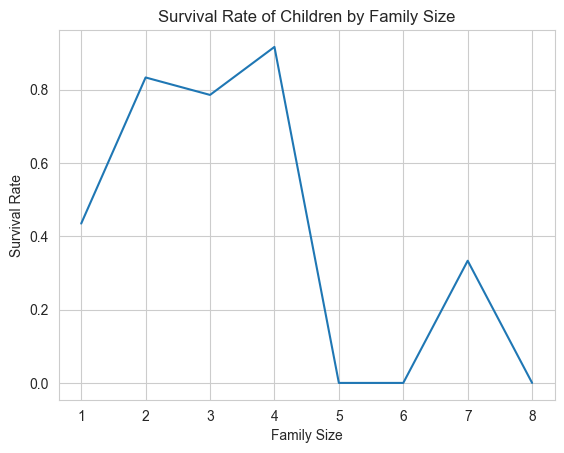

In [32]:
# Create a line plot of the survival rates of children based on their family size
plt.plot(family_size_survival_rate.index, family_size_survival_rate.values)
plt.title('Survival Rate of Children by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

#### Finally, I examined the impact of the fare paid for the ticket on the survival rate of children. We can see that the survival rate of children did not vary significantly based on whether their ticket fare was above or below the median fare. Children who paid below the median fare did have a slightly higher survival rate, but the difference is not significant.

In [27]:
# Create a new column that represents whether the fare paid for each child's ticket was above or below the median fare
median_fare = children['Fare'].median()
children['FareAboveMedian'] = children['Fare'] > median_fare

# Calculate the survival rate of children based on whether their ticket fare was above or below the median fare
fare_survival_rate = children.groupby('FareAboveMedian')['Survived'].mean()

print(fare_survival_rate)

FareAboveMedian
False    0.596491
True     0.482143
Name: Survived, dtype: float64


/var/folders/pz/vyv191b97fnblp27mycbjnnm0000gn/T/ipykernel_91627/1295825159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children['FareAboveMedian'] = children['Fare'] > median_fare


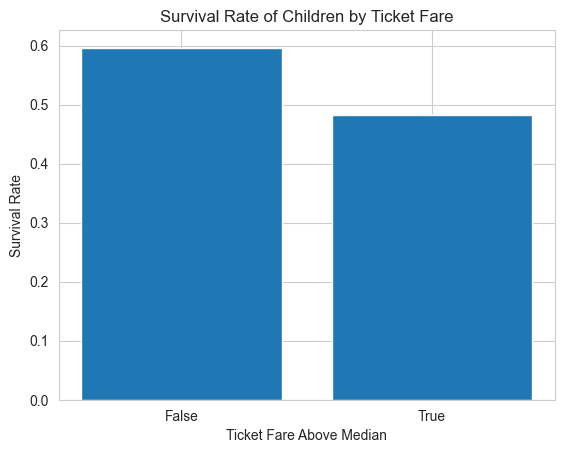

In [33]:
# Create a bar chart of the survival rates of children based on whether their ticket fare was above or below the median fare
plt.bar(fare_survival_rate.index.astype(str), fare_survival_rate.values)
plt.title('Survival Rate of Children by Ticket Fare')
plt.xlabel('Ticket Fare Above Median')
plt.ylabel('Survival Rate')
plt.show()

## SPSN Presentation

In [2]:
from IPython.display import IFrame

# Display the PDF file in Jupyter Notebook
IFrame("SPSN.pdf", width=600, height=400)